# IMS_WS_Data_Analysis_2024

Introduction to Machine Learning with Python

We will use an example of a .csv file to apply machine learning concepts 

Run this File in VS Code, Google Colab or any other IDE of choice.

Students are expected to collect and create custom data .csv files from their projects and apply machine learning.

## Check the installation and python packages

NumPy version: 1.21.0
Pandas version: 1.3.3
SciPy version: 1.7.1
Statsmodels version: 0.12.2
Seaborn version: 0.11.2
Matplotlib version: 3.4.3
Scikit-Learn version: 1.0


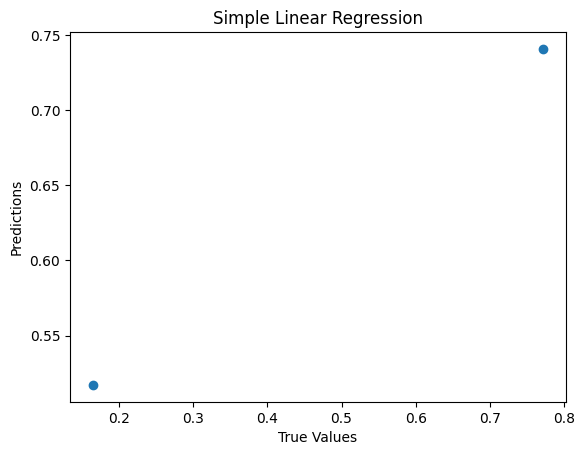

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version

# Print versions to verify
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"Statsmodels version: {sm.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn_version}")

# Load a sample dataset
data = pd.DataFrame({
    'A': np.random.rand(10),
    'B': np.random.rand(10),
    'C': np.random.rand(10),
    'D': np.random.rand(10)
})

# Perform a simple linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['A', 'B']]
y = data['C']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Plot the results
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Simple Linear Regression')
plt.show()



# Canadian Toys Dataset Analysis

In [17]:
import pandas as pd #Import Pandas Library

#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv("/Users/trickfinger/Downloads/IMS Workshop_v2/Data_Analysis/canadian_toy_dataset.csv") #Type in the path to your folder

#Tell it what our columns are by passing along a list of that information
data.columns = ["city","gender","age","income","ill"]

print("Ill or not?")
print(data.groupby("ill")["city"].count())
print("\nTotal records:", len(data))


Ill or not?
ill
No     137861
Yes     12139
Name: city, dtype: int64

Total records: 150000


## Machine Learning Basics

Don't let the impressive name fool you. Machine learning is more or less the following steps

1. Getting your data and cleaning it up
1. Identify what parts of your data are **features**
1. Identify what is your **target variable** that you'll guess based on your features
1. Split your data in **training and testing sets**
1. **Train** your model against the training set
1. **Validate** your model against the testing set


We are going to use the Python library [scikit-learn](https://scikit-learn.org/stable/) and we are going to be doing a [classification](https://en.wikipedia.org/wiki/Statistical_classification) problem.

![classification](https://www.unite.ai/wp-content/uploads/2020/04/thinkingai.jpeg)


## Decision Tree

This is one of the most basic machine learning model you can use. It is considered a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) method. You create the best [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) that you can based on your training data. Here's an example tree that shows your chance of surviving the Titanic disaster. What we are creating is series of question that when answered will put observations into a _bucket_ or in other terms one of the classification options. We also devise a probability associated with an observation falling into that _bucket_.

The features are described by the labels, however ``sibsp`` - is the number of spouses or siblings on board.

![dtree](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)


So in this tree the most important question to ask first is what is the gender of the person you are considering, then next most important question is age above 9 and a half, followed lastly by, does this person have less than three spouses or siblings on board.


Let's start by loading the Libraries we need

In [18]:

#This should look familar
import pandas as pd
import numpy as np


#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'Machine Learning pieces'
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn import metrics 
from sklearn import tree

print("Ready to proceed!")

Ready to proceed!


## Getting the data ready

Now, let's load our data. Our decision tree can only work with numerical values, so we'll have to modify the columns of data that are text based. As stated preparing the data is usually the most difficult part of the process.

In [19]:
data = pd.read_csv("/Users/trickfinger/Downloads/IMS Workshop_v2/Data_Analysis/canadian_toy_dataset.csv")
data.columns = ["city","gender","age","income","ill"]
data.head()

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No


This dataset is fairly clean, we just need to represent it all as numbers instead of text labels. So that means we need to change the columns:


- `ill` - instead of a No / Yes label we'll use 0 and 2 instead
- `city` - this will break out the column into 8 different columns
- `gender` - this will break out the column into 2 different columns


In [20]:
#Instead of yes/no we'll use a 0 or 2
#We use the value '2' to make our analysis later on less ambiguous
data["ill"].replace({"No":0, "Yes":2},inplace=True)

#We change categorical values into numeric ones using `dummies`
data = pd.get_dummies(data, columns=['city','gender'])
data.head(5)

,age,income,ill,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
0,41,40367,0,0,0,1,0,0,0,0,0,0,1
1,54,45084,0,0,0,1,0,0,0,0,0,0,1
2,42,52483,0,0,0,1,0,0,0,0,0,0,1
3,40,40941,0,0,0,1,0,0,0,0,0,0,1
4,46,50289,0,0,0,1,0,0,0,0,0,0,1


The example above shows 5 entries that come from Montreal.

In [21]:
data.tail(5)

,age,income,ill,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
149995,48,93669,0,1,0,0,0,0,0,0,0,0,1
149996,25,96748,0,1,0,0,0,0,0,0,0,0,1
149997,26,111885,0,1,0,0,0,0,0,0,0,0,1
149998,25,111878,0,1,0,0,0,0,0,0,0,0,1
149999,37,87251,0,1,0,0,0,0,0,0,0,1,0


This example shows the last 5 entries in the dataframe that come from Edmonton. 


## Now we are done with the most difficult part of the process, understanding the data and getting it ready.


----

## Building and Running the Model

We now have our data cleaned up, and represented in a way that Scikit will be able to analyze. To be honest the most difficult part of the process is done.

We now need to split our columns in two types:
- **features** represent the data we use to build our guess
- **target variable** the thing our model hopes to guess

In [22]:
#all of the following columns are features, we'll make a list of their names
features = ["age",\
            "income",\
            "city_Edmonton",\
            "city_Halifax",\
            "city_Montreal",
            "city_Ottawa",\
            "city_Regina",\
            "city_Toronto",
            "city_Vancouver",\
            "city_Waterloo",\
            "gender_Female",\
            "gender_Male"]

X = data[features]

#We want to target the ill column
y = data.ill


## Training and testing

Now that we have built our model we need to get the data ready for it. We do this by breaking it into two different pieces. The diagram shows a conceptualization of how this is proportioned.

![Train Test Split](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/train_test.png)

- **Training set** - This is what is used to build the model. If we set this value too large the ML Model just _memorizes_ the data so we need to be careful when setting this value. This is called _overfitting_ the data.
- **Testing set** - This is used to see if our guesses are correct

Before we were looking at the **columns** of the data, this investigation of training/testing looks at the **rows** of data.



In [23]:
#Training and test together make up 100% of the data!
#We start with a baseline of 30% of our data as testing

test_percent = 30
train_percent = 100 - test_percent

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

Now the interesting part, we build our model, **train** it against the **training set** and see how it **predicts** against the **testing set**

In [24]:
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)


## Accuracy of the Model

To see how good our machine learning model is we need to see how accurate our predictions are. `Scikit` has built in functions and [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) to do this for us.

In [25]:
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy: 
0.846



## Making Predictions

Not bad. We can use our model to predict a guess for **ill** if we pass along all of the other parameters. Our model only tells us if someone is ill or not. This is directly asking our classification model to give us a prediction based on a pretend record.

Since this classifier tells us if someone is ill or someone is not ill, it has two outputs.


In [26]:
data.ill.unique()

array([0, 2])

In [27]:
# I randomly picked a record in the dataset to test if the prediction is correct. 
# This is from line: 149120 of the datafile
person_x_yes = [
        32, #age
        82311, #income
        1, #city_Edmonton
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        0, #gender_Female
        1, #gender_Male
]

person_x_yes = pd.DataFrame([person_x_yes],columns=X_test.columns)

print("Someone who is ill")
print("Class predicted by model: ",treeClass.predict(person_x_yes))
print("Probablity associated with the guess: ",treeClass.predict_proba(person_x_yes))



# I randomly picked a record in the dataset to test if the prediction is correct. 
# This is from line: 149121 of the datafile
person_x_no = [
        40, #age
        89780, #income
        1, #city_Edmonton
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        1, #gender_Female
        0, #gender_Male
]

#Use the dataframe of our fictional person in our model and get our prediction
person_x_no = pd.DataFrame([person_x_no],columns=X_test.columns)

print("\nSomeone who was not ill")
print("Class predicted by model: ", treeClass.predict(person_x_no))
print("Probablity associated with the guess: ", treeClass.predict_proba(person_x_no))



Someone who is ill
Class predicted by model:  [2]
Probablity associated with the guess:  [[0. 1.]]

Someone who was not ill
Class predicted by model:  [0]
Probablity associated with the guess:  [[1. 0.]]


Our model is very confident in it's ability to made predictions!

With this model constucted we can make ask it question so to speak. We can provide it with details about a pretend person and see what classification the model will place this person.

## Making a prediction with our model

Try to set some parameters in the `pretend_person` variable below to make the prediction determine that the person is **ill**. If you can find one please copy and paste it into the chat box for others to try. You can do this by:
- changing the values **line 2 & line 3** for age and income
- pick one line from **line 4 to line 11** and change a single row to a value of 1
- pick one line from **line 12 to line 13** and change a single row to a value of 1


## Question 1
- Try to come up with some set of values that creates an `ill` person. Share your choices in the chat box
- Try to come up with some set of values that doesn't create an `ill` person. Share you choices in the chat box

In [28]:
pretend_person = pd.DataFrame([
        30, #age - FILL IN
        5000, #income - FILL IN
        1, #city_Edmonton - ONLY 1 city at a time
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        1, #gender_Female - ONLY 1 gender at a time
        0, #gender_Male
])


#turn our pretend person into a dataframe that is the correct dimensions
pretend_person = pretend_person.T 
pretend_person.columns = X_test.columns

print("\Pretend person details")
print(pretend_person.head())

print("Pretend person Class predicted")
print(treeClass.predict(pretend_person))

print("Pretend person probablity of guess")
print(treeClass.predict_proba(pretend_person))

\Pretend person details
   age  income  city_Edmonton  city_Halifax  city_Montreal  city_Ottawa  \
0   30    5000              1             0              0            0   

   city_Regina  city_Toronto  city_Vancouver  city_Waterloo  gender_Female  \
0            0             0               0              0              1   

   gender_Male  
0            0  
Pretend person Class predicted
[0]
Pretend person probablity of guess
[[1. 0.]]



## Visualizing our Decision Tree

We can 'visualize' the decision tree to trace through the decisions it makes. In this case we can tell that **income level** is the most important factor that we consider since we ask so many questions about that before looking at any of the other features.

## Question 2

What is the first question the tree is asking you to make? Share your thoughts in the chat box.

In [29]:
printed_tree = export_text(treeClass,feature_names=features)
print(printed_tree)

|--- income <= -35.00
|   |--- class: 2
|--- income >  -35.00
|   |--- income <= 29255.00
|   |   |--- income <= 29190.00
|   |   |   |--- income <= 3254.50
|   |   |   |   |--- income <= 2570.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- income >  2570.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- income >  3254.50
|   |   |   |   |--- income <= 24960.00
|   |   |   |   |   |--- income <= 22569.00
|   |   |   |   |   |   |--- income <= 22544.50
|   |   |   |   |   |   |   |--- income <= 18228.50
|   |   |   |   |   |   |   |   |--- age <= 54.50
|   |   |   |   |   |   |   |   |   |--- age <= 42.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- age >  41.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- age >  42.50
|   |   |   |   |   |   |   |   |   |   |--- class

## Tuning parameters - Testing Set Sizes

To make our models run better we can tweak _many, many, many_ different parameters. For example, we can vary the testing data size percentage. We'll try some different values and plot our our accuracy of our predictions.

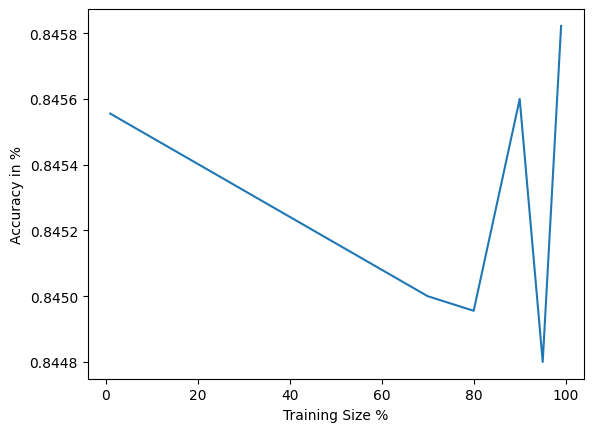

In [30]:
testing_percents = [1,5,10,20,30,99]
accuracy = []
training_percents = []

for test_ratio in sorted(testing_percents):
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10)
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100 - test_ratio)

    
plt.plot(training_percents,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

(Your graph might look different, this is a statistical operation and will probably vary across different machines)

## Tuning Parameters - Maximum depth of the tree

We can restrict how deep our tree will be by setting `max_depth` in our `DecisionTreeClassifier` variable. Below is another example of trying different values in our ML model for this parameter and plotting out the accuracy of our model.

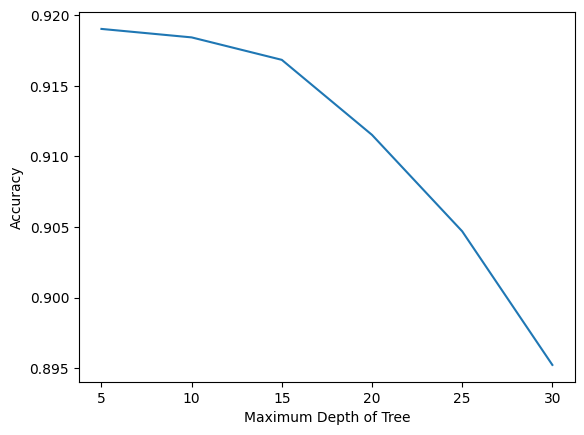

In [31]:
test_percent = 70
max_options = [5,10,15,20,25,30]

accuracy = []
tree_max = []

for max_d in sorted(max_options):
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )
    
    #We set maximum depth in the DecisionTreeClassifer when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)

    
plt.plot(max_options,accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()

## Further Reading & Few Examples

- [UCI Machine Learning Archive](http://archive.ics.uci.edu/ml) A place to find good data sets that you can use to build models with

- [A Gentle Introduction to Scikit-Learn](https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/)

- [Data Science Handbook by Field Cady](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119092919)

- [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) - A bit more complex, but is a good next step

- [Kaggle](https://www.kaggle.com/) - A great website with lots of tutorials and data sets to learn and experiment with.


# Weather Dataset Analysis

In [34]:
# importing libraries
import pandas as pd
import numpy as np
 
# read the data in a pandas dataframe
data = pd.read_csv("/Users/trickfinger/Downloads/IMS Workshop_v2/Data_Analysis/austin_weather.csv") #Add the path accordingly
 
# drop or delete the unnecessary columns in the data.
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',
                  'SeaLevelPressureLowInches'], axis=1)
 
# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)
 
# the data also contains '-' which indicates no
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)
 
# save the data in a csv file
data.to_csv('austin_final.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precipitation in inches for the input is: [[1.33868402]]
the precipitation trend graph: 


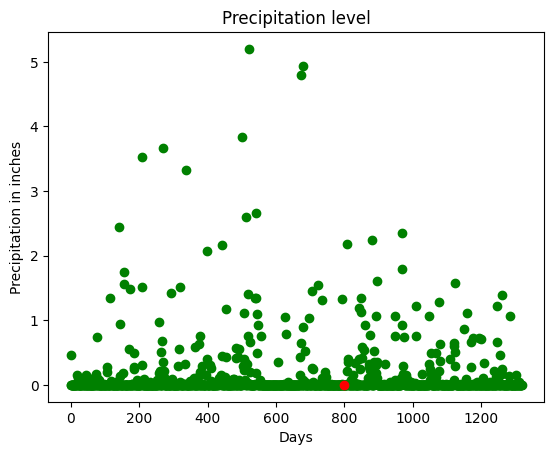

Precipitation vs selected attributes graph: 


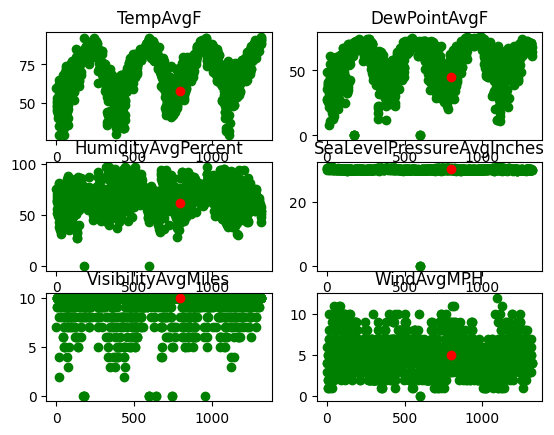

In [35]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# read the cleaned data
data = pd.read_csv("austin_final.csv")

# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
X = data.drop(['PrecipitationSumInches'], axis=1)

# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

# consider a random day in the dataset
# we shall plot a graph and observe this
# day
day_index = 798
days = [i for i in range(Y.size)]

# initialize a linear regression classifier
clf = LinearRegression()
# train the classifier with our
# input data.
clf.fit(X, Y)

# give a sample input to test our model
# this is a 2-D vector that contains values
# for each column in the dataset.
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
				[57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1, -1)

# print the output.
print('The precipitation in inches for the input is:', clf.predict(inp))

# plot a graph of the precipitation levels
# versus the total number of days.
# one day, which is in red, is
# tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")


plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
				'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
				'WindAvgMPH'], axis=1)

# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends

print("Precipitation vs selected attributes graph: ")

for i in range(x_vis.columns.size):
	plt.subplot(3, 2, i + 1)
	plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
				color='g')

	plt.scatter(days[day_index],
				x_vis[x_vis.columns.values[i]][day_index],
				color='r')

	plt.title(x_vis.columns.values[i])

plt.show()


# Smart Home Device Usage Dataset Analysis

## Simple Analysis

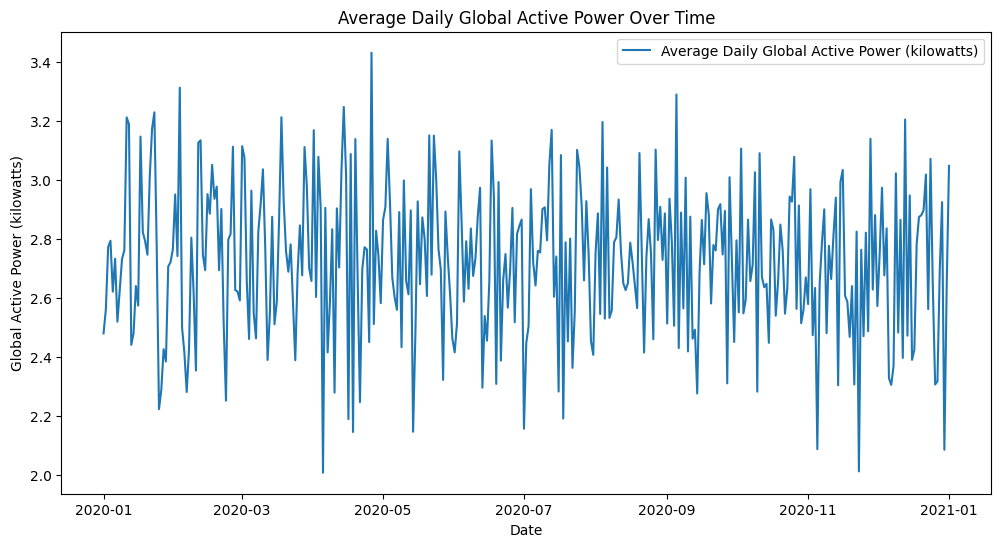

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('smart_home_device_usage_data.csv')

# Combine date and time columns into a single datetime column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Set datetime as the index
data.set_index('datetime', inplace=True)

# Resample the data to daily frequency and calculate the average daily global active power
daily_data = data['Global_active_power'].resample('D').mean()

# Plot the average daily global active power
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Average Daily Global Active Power (kilowatts)')
plt.title('Average Daily Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()
